In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./data/minivans.csv')

In [3]:
columns_to_keep = ['manufacturer','price','year','model','condition','paint_color',
                   'odometer','title_status','state','lat','long']

In [6]:
df = df[columns_to_keep]

In [4]:
df['count'] = 1
df['age'] = 2022-df['year']

In [5]:
new = df.groupby(['manufacturer','age']).agg({'price':'mean','count':'sum','odometer':'mean'}).reset_index()

In [7]:
import plotly.express as px

fig = px.scatter(new, x='age', y='price', color='manufacturer')
fig.show()

In [8]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

In [9]:
toyota = new[new['manufacturer']=='toyota']

In [10]:
def exp_func(x,a,b):
    return a*np.exp(b*x)

x_data = toyota['age'].values
y_data = toyota['price'].values

params, _ = curve_fit(exp_func, x_data, y_data)

In [11]:
x_range = np.arange(0,30,1)

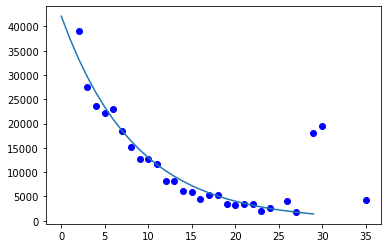

In [12]:
plt.plot(x_data,y_data,'bo')
plt.plot(x_range, exp_func(x_range, *params))
plt.show()

In [47]:
df_toyota = df[df['manufacturer']=='toyota']

In [49]:
ages = df_toyota['age'].values
prices = df_toyota['price'].values

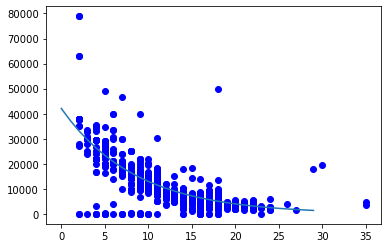

In [50]:
plt.plot(ages,prices,'bo')
plt.plot(x_range, exp_func(x_range, *params))
plt.show()